# Proyecto práctico: árboles de decisión

**Utilizaremos** [Dataset Car Evaluation](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set)


En este proyecto, exploraremos el conjunto de datos "Car Evaluation Data Set" y utilizaremos árboles de decisión para construir un modelo de clasificación capaz de predecir la calidad de compra de un automóvil.

## Conociendo nuestro dataset

El conjunto de datos "Car Evaluation Data Set" es un conjunto de datos público que consta de 1728 instancias etiquetadas con la clase de calidad de compra del automóvil. Cada instancia tiene 6 atributos discretos: precio, mantenimiento, número de puertas, capacidad de personas, tamaño del maletero y seguridad.


Los atributos son definidos de la siguiente manera:

- price (Precio): representa el costo del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- maint (Mantenimiento): representa el costo de mantenimiento del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- doors (Número de puertas): representa la cantidad de puertas que tiene el automóvil. Los valores posibles son '2', '3', '4' y '5more' (5 o más).

- persons (Capacidad de personas): representa la capacidad de personas que puede transportar el automóvil. Los valores posibles son '2', '4', 'more' (más de 4).

- lug_boot (Tamaño del maletero): representa el tamaño del maletero del automóvil. Los valores posibles son 'small' (pequeño), 'med' (medio) y 'big' (grande).

- safety (Seguridad): representa la calidad de seguridad del automóvil. Los valores posibles son 'low' (baja), 'med' (media) y 'high' (alta).

- Class (Evaluación de la calidad de los automóviles):. Esta variable objetivo tiene cuatro posibles valores de clasificación: "unacc" (inaceptable), "acc" (aceptable), "good" (bueno) y "vgood" (muy bueno).

## Importar librerias

In [265]:
# Manejo y manipulacion de datos
import numpy as np
import pandas as pd
# Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar el en forma de tree
from sklearn import tree

# Balanceando los datos
from imblearn.under_sampling import RandomUnderSampler

# Seaparar nuestros datos en entrenamiento y prueba
# Optimizacion de hiperparametros
from sklearn.model_selection import train_test_split, GridSearchCV

# Modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier

# Metricas del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Para category-encoders
import category_encoders as ce

# Estilo predefinido
sns.set(style="whitegrid", context='notebook', palette='pastel')

## Cargamos dataset

In [4]:
df = pd.read_csv("../data/car_evaluation.csv", header=None, sep=',')

# Analisis exploratorio de datos

Visualizacion del DatFrame

In [8]:
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


Las columnas no tienen un nombre como tal

In [6]:
df.shape

(1728, 7)

El dataset contiene 1728 observaciones y 7 variables

Renombrar las columnas para entender mejor las columnas los datos

In [182]:
col_names = ['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

Verificamos la transformacion

In [183]:
df.head(10)

,price,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


Tipos de datos

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Hay 7 variables en el conjunto de datos, donde todas están clasificadas como datos categóricos.


- •La variable **Class** es el objetivo del análisis.

Explorando la variable target

In [14]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Verificar si hay datos faltantes

In [185]:
df.isna().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Data pre-processing

Drop duplicates

In [186]:
df.drop_duplicates()

,price,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Tampoco se encuentran datos duplicados

In [187]:
def resumen_c_p(df, target):
    """Funcion conteno y proporcion de datos

    Args:
        df (pd.DataFrame): Un dataframe de pandas
        target (Columna): La columna a analizar
    """
    count = df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)
    
    df_resumen = pd.DataFrame({"Freq[N]": count, 'Prop[%]': prop.round(4)})
    
    return df_resumen

Ver el conteo y la proporcion de Class

In [188]:
for i in col_names:
    print(" "*7, i.upper())
    print(resumen_c_p(df, i))
    print('*'*30)

        PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
******************************
        MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
******************************
        DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      432     0.25
******************************
        PERSONS
         Freq[N]  Prop[%]
persons                  
2            576   0.3333
4            576   0.3333
more         576   0.3333
******************************
        LUG_BOOT
          Freq[N]  Prop[%]
lug_boot                  
small         576   0.3333
med           576   0.3333
big           576   0.3333
******************************
        SAFETY
        Freq[N]  Prop[%]
safety                  
low     

Graficamos la variable Class separada por los distintos atributos

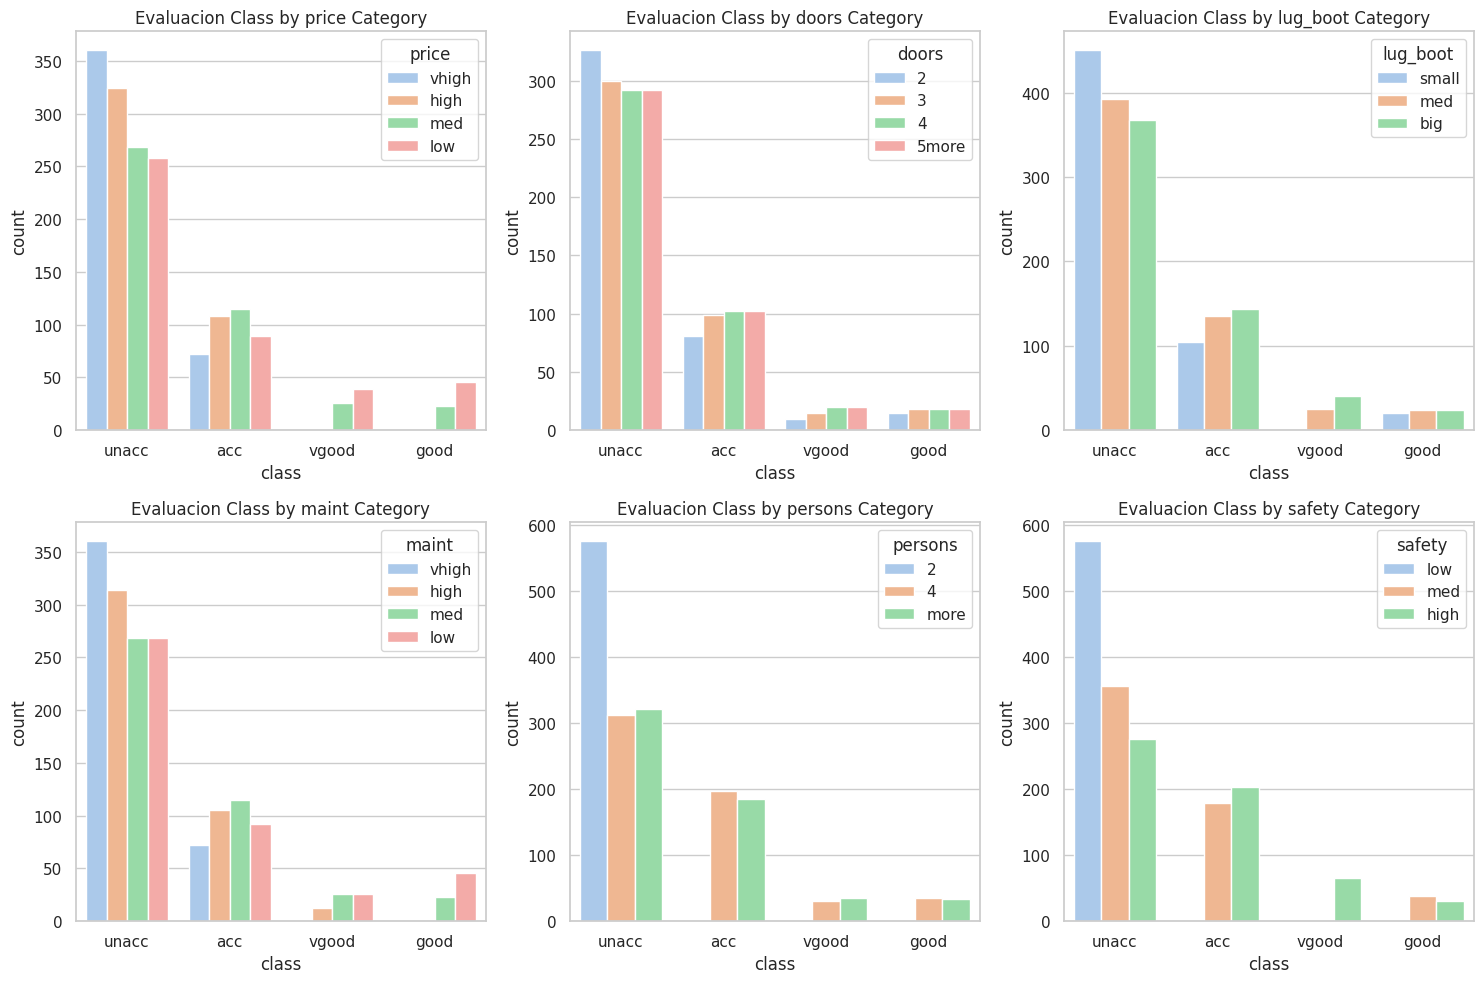

In [189]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, variable in enumerate(col_names[:-1]):
    row = i % 2
    col = i // 2
    sns.countplot(data=df, x='class', hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Evaluacion Class by {variable} Category")

plt.tight_layout()
plt.show()

## Insight


- Price: Los autos con precio bajo o medio tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de precio alto.

- Doors: Los autos con 4 o más puertas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de 3 o 2 puertas.

- Lug_boot: Los autos con maletero grande o mediano tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con maletero pequeño.

- Maint: Los autos con costos de mantenimiento bajos o medios tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con costos de mantenimiento altos.
•Persons: Los autos con capacidad de 4 o más personas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con capacidad de menos de 4 personas.

- Safety: Los autos con alto nivel de seguridad tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con bajo o medio nivel de seguridad.


# Feature Engineering

## UnderSampling o Balanceo de Dataset

In [190]:
df['class'].value_counts(normalize=True) * 100

class
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: proportion, dtype: float64

Conteo

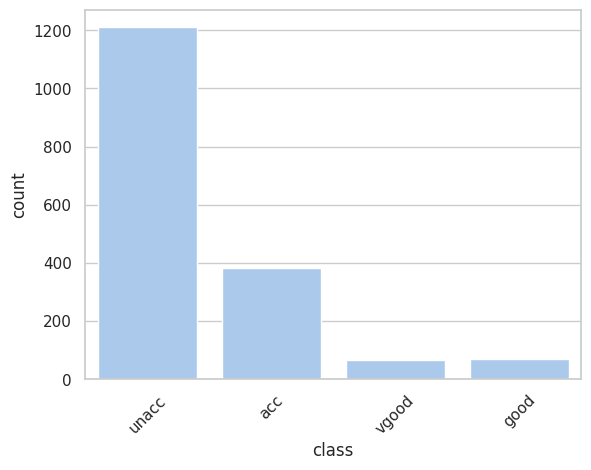

In [191]:
sns.countplot(data=df, x='class')
plt.xticks(rotation=45)
plt.show()

Proporcion

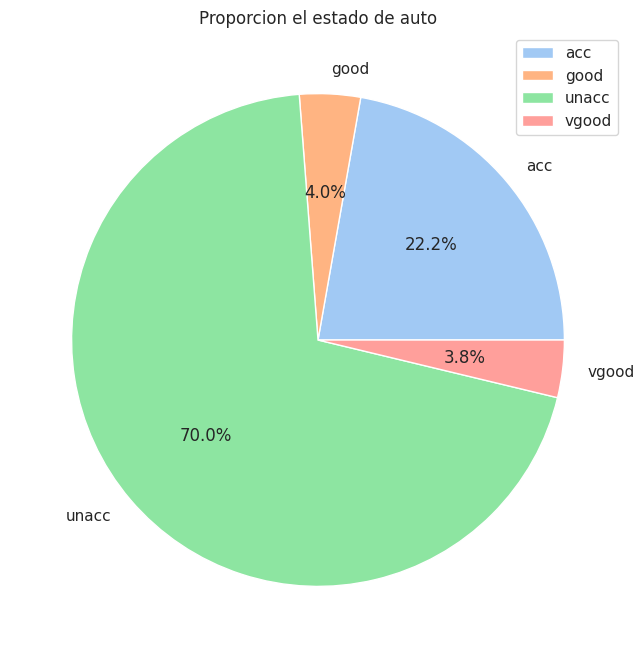

In [192]:
labels, counts = np.unique(df['class'], return_counts=True)

plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Proporcion el estado de auto")
plt.legend()
plt.show()

### Declarando variables predictoras y variable objetivo

In [242]:
X = df.drop(['class'], axis=1)
y = df['class']

Prueba con underSampling

In [243]:
under_sample = RandomUnderSampler(random_state=42)

In [244]:
X_under, y_under = under_sample.fit_resample(X, y)

30% para test y 70% para train

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #stratify=y

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

Para evitar el sesgo en la división de los datos es ideal pasar el argumento “stratify = y” en train_test_split, lo cual garantiza que la distribución de clases en la variable de destino “y”, se conserve tanto en el conjunto de entrenamiento como en el de prueba.

In [246]:
X_train.shape, X_test.shape

((182, 6), (78, 6))

In [247]:
y_train.shape, y_test.shape

((182,), (78,))

In [248]:
X_train.head(10)

,price,maint,doors,persons,lug_boot,safety
1643,low,low,2,more,med,high
1483,low,high,4,more,big,med
1691,low,low,4,4,big,high
1535,low,med,2,more,med,high
1606,low,med,5more,4,med,med
844,high,low,5more,2,big,med
1669,low,low,3,more,med,med
1670,low,low,3,more,med,high
23,vhigh,vhigh,2,more,med,high
1321,low,vhigh,2,more,big,med


In [249]:
X_train.dtypes

price       object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# Entrenamiento del modelo de clasificacion con arbol de decision

Vemos que nuestros datos son objectos entonces vamos a hacer un encoding

In [250]:
encoder = ce.OrdinalEncoder(cols=col_names[:-1])

# Train
X_train = encoder.fit_transform(X_train)
# Test
X_test = encoder.transform(X_test)

Verficando la transformacion

In [251]:
X_train.head(10)

,price,maint,doors,persons,lug_boot,safety
1643,1,1,1,1,1,1
1483,1,2,2,1,2,2
1691,1,1,2,2,2,1
1535,1,3,1,1,1,1
1606,1,3,3,2,1,2
844,2,1,3,3,2,2
1669,1,1,4,1,1,2
1670,1,1,4,1,1,1
23,3,4,1,1,1,1
1321,1,4,1,1,2,2


In [252]:
X_test.head(10)

,price,maint,doors,persons,lug_boot,safety
659,2,3,1,2,3,1
65,3,4,2,2,3,1
1448,1,2,4,2,2,1
1362,1,4,2,2,1,3
1238,4,1,4,1,1,1
1724,1,1,3,1,1,1
337,3,1,1,2,1,2
510,2,4,2,1,2,3
1048,4,2,2,1,1,2
1620,1,1,1,3,3,3


In [253]:
y_train.head()

1643     good
1483      acc
1691    vgood
1535     good
1606     good
Name: class, dtype: object

In [254]:
y_test.head()

659       acc
65      unacc
1448    vgood
1362    unacc
1238    vgood
Name: class, dtype: object

Instanciar el modelo

In [255]:
DTC = DecisionTreeClassifier(random_state=42)

In [256]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2, 3, 4, 5]
}

In [257]:

grid_search = GridSearchCV(DTC, param_grid=param_grid, cv=10, return_train_score=True)


# Entrenar
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5]},
             return_train_score=True)

Los mejores resultados

In [258]:
for params, mean_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    print(f"Parametros: {params}\n")
    print("="*70)
    print(f"Mean Score: {mean_score}")

Parametros: {'criterion': 'gini', 'max_depth': 2}

Mean Score: 0.45087719298245615
Parametros: {'criterion': 'gini', 'max_depth': 3}

Mean Score: 0.5880116959064328
Parametros: {'criterion': 'gini', 'max_depth': 4}

Mean Score: 0.6435672514619883
Parametros: {'criterion': 'gini', 'max_depth': 5}

Mean Score: 0.7485380116959065
Parametros: {'criterion': 'entropy', 'max_depth': 2}

Mean Score: 0.5397660818713451
Parametros: {'criterion': 'entropy', 'max_depth': 3}

Mean Score: 0.6874269005847953
Parametros: {'criterion': 'entropy', 'max_depth': 4}

Mean Score: 0.6929824561403508
Parametros: {'criterion': 'entropy', 'max_depth': 5}

Mean Score: 0.7751461988304094
Parametros: {'criterion': 'log_loss', 'max_depth': 2}

Mean Score: 0.5397660818713451
Parametros: {'criterion': 'log_loss', 'max_depth': 3}

Mean Score: 0.6874269005847953
Parametros: {'criterion': 'log_loss', 'max_depth': 4}

Mean Score: 0.6929824561403508
Parametros: {'criterion': 'log_loss', 'max_depth': 5}

Mean Score: 0.7751

In [259]:
print(f"Mejores hiperParametros encontrados: {grid_search.best_params_}")
print("-"*50)
print(f"Mejor puntuacion de valudacion cruzada: {grid_search.best_score_}\n")

Mejores hiperParametros encontrados: {'criterion': 'entropy', 'max_depth': 5}
--------------------------------------------------
Mejor puntuacion de valudacion cruzada: 0.7751461988304094



In [260]:
best_clf = grid_search.best_estimator_

print(best_clf)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


Calculando las predicciones en Train y TEST

In [261]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

# Evaluacion del modelo

- **Accuracy es la excactitud**: Presicion de nuestro modelo.

- **Recall // Sensibilidad** Entender la tasa de verdaderos positivos.

- **Especificidad** // Nos hace entender la tasa de los verdaderos negativos.

- **F1** Resumen precisión y sensibilidad en una sola metrica.

In [262]:
# Train
train_accuracy = accuracy_score(y_train, y_train_pred)
# Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy: ", train_accuracy)
print("-"*60)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.8406593406593407
------------------------------------------------------------
Test accuracy:  0.7435897435897436


La precisión en los conjuntos de datos de entrenamiento y prueba están muy cercanas, lo que sugiere que el modelo no está sufriendo de sobreajuste.

In [263]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         acc       0.50      0.81      0.62        16
        good       0.80      0.52      0.63        23
       unacc       1.00      0.70      0.82        20
       vgood       0.83      1.00      0.90        19

    accuracy                           0.74        78
   macro avg       0.78      0.76      0.74        78
weighted avg       0.80      0.74      0.74        78



Podemos observar que el f1-score de la clase 'good' es relativamente bajo, mientras que el f1-score de 'unacc' es alto. Esto sugiere que el modelo tiene dificultades para clasificar correctamente las clase 'good'. Por otro lado, el f1-score de 'acc' y 'vgood' es promedio.

El f1-score promedio general es de 0.74, lo cual indica que el modelo tiene un buen rendimiento general en la clasificación de las distintas clases.

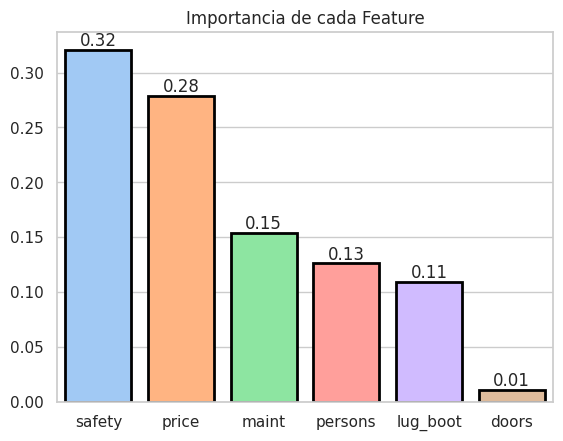

,0
safety,0.321011
price,0.279121
maint,0.153882
persons,0.125951
lug_boot,0.109452
doors,0.010584


In [264]:
# Vamos a ordenar las importancias
importances = best_clf.feature_importances_


# Todas las variables que no son el target
columns = X.columns

# Creacion de un DataFrame con las variables y sus importancias
# Ordenar el DataFrame por importancia en orden descendente

df_scores = pd.DataFrame(pd.Series(importances, index=columns).sort_values(ascending=False)).T


# anotaciones
for index, value in enumerate(df_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

# # Gracion del barplot
sns.barplot(data=df_scores, saturation=2.0, edgecolor="black", linewidth=2)
plt.title("Importancia de cada Feature")
plt.show()
pd.DataFrame(df_scores.T)

El **precio** y el **mantenimiento** de un automóvil son factores cruciales en la determinación de su clasificación.

## Graficamos la matriz de  confusion

- Permite visualizar el desempeño de un algoritmo de aprendizaje supervisado.

- Cada columna represeta el numero de predicciones de cada clase.

- Cada fila represeta a las instancias en la clase real.

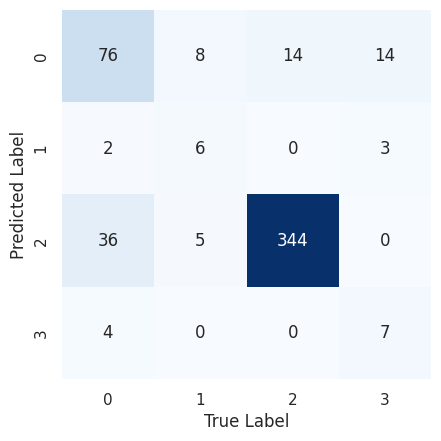

In [234]:
cm = confusion_matrix(y_test_pred, y_test, labels=best_clf.classes_)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True, cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

Visualizar el entrenamiento

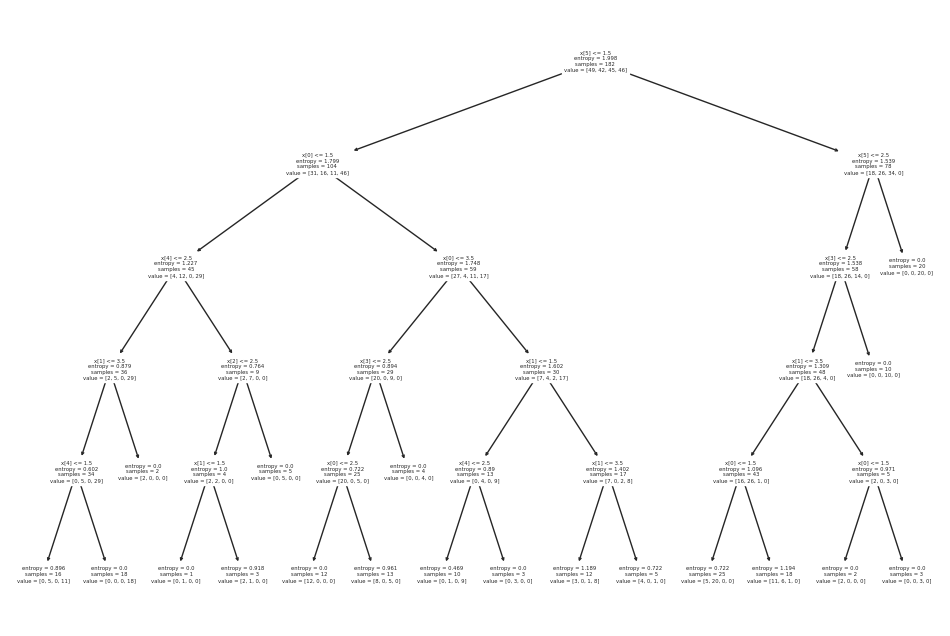

In [266]:
plt.figure(figsize=(12,8))

tree.plot_tree(best_clf.fit(X_train, y_train));